In [2]:
import numpy as np              #importing important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("Credit_V2.csv")    #reading dataset

In [4]:
data           # visualising dataset

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,52,1,6,9,29,16.3,1.715901,3.011099,0
1,48,1,22,15,100,9.1,3.703700,5.396300,0
2,36,2,9,6,49,8.6,0.817516,3.396484,1
3,36,2,13,6,41,16.4,2.918216,3.805784,1
4,43,1,23,19,72,7.6,1.181952,4.290048,0
...,...,...,...,...,...,...,...,...,...
682,36,2,6,15,27,4.6,0.262062,0.979938,1
683,29,2,6,4,21,11.5,0.369495,2.045505,0
684,33,1,15,3,32,7.6,0.491264,1.940736,0
685,45,1,19,22,77,8.4,2.302608,4.165392,0


In [5]:
data.describe()   #description of dataset

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000
mean,34.871907,1.730713,8.362445,8.285298,45.464338,10.225182,1.538002,3.051960,0.262009
std,8.010628,0.931457,6.633772,6.850345,36.628799,6.782480,2.096725,3.271137,0.440048
min,20.000000,1.000000,0.000000,0.000000,14.000000,0.400000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.000000,0.368623,1.043060,0.000000
50%,34.000000,1.000000,7.000000,7.000000,34.000000,8.600000,0.850850,1.961712,0.000000
75%,40.000000,2.000000,12.000000,12.000000,54.000000,14.050000,1.887698,3.930448,1.000000
max,56.000000,5.000000,31.000000,34.000000,446.000000,41.300000,20.561310,27.033600,1.000000


In [6]:
data.isnull().sum()        # checking null values

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

In [7]:
num_features=[features for features in data.columns if data[features].dtypes !="O"]   #looking for numericle features
print(num_features)

['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt', 'default']


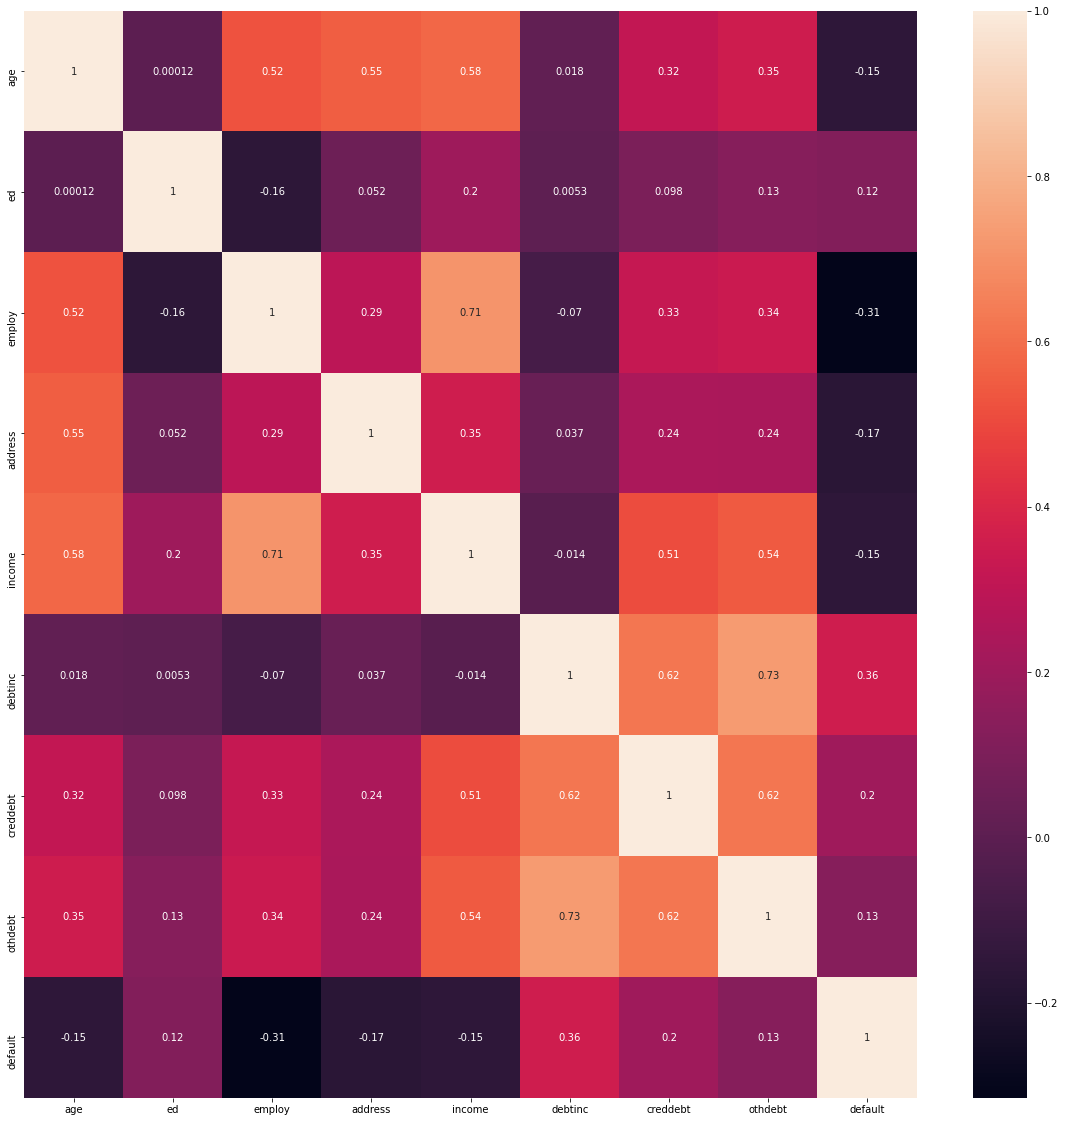

In [8]:
corrmat = data.corr(method = "spearman")        #plotting correlation matrix
plt.figure(figsize=(20,20))
plot=sns.heatmap(corrmat,annot=True)

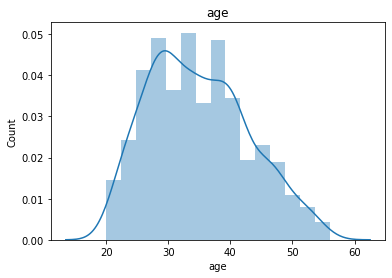

<Figure size 1080x1080 with 0 Axes>

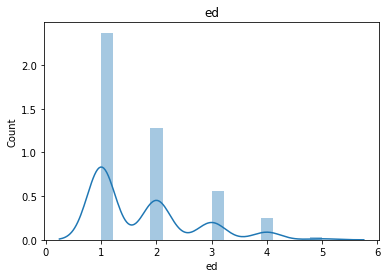

<Figure size 1080x1080 with 0 Axes>

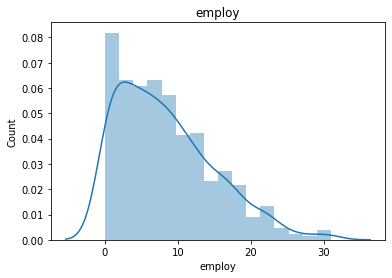

<Figure size 1080x1080 with 0 Axes>

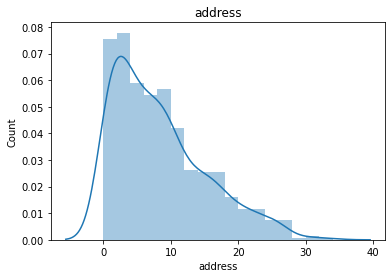

<Figure size 1080x1080 with 0 Axes>

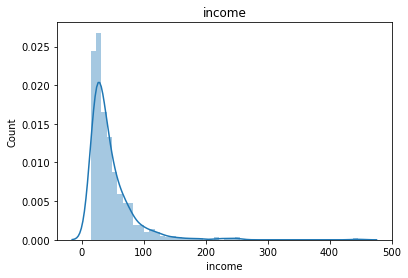

<Figure size 1080x1080 with 0 Axes>

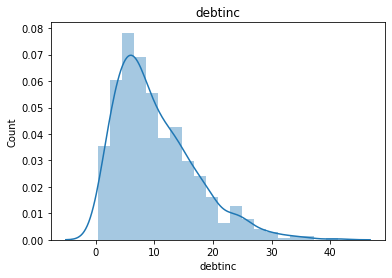

<Figure size 1080x1080 with 0 Axes>

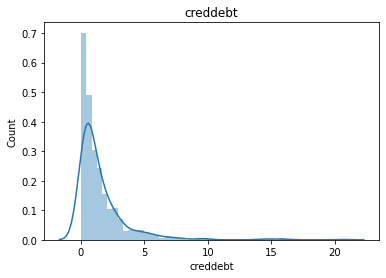

<Figure size 1080x1080 with 0 Axes>

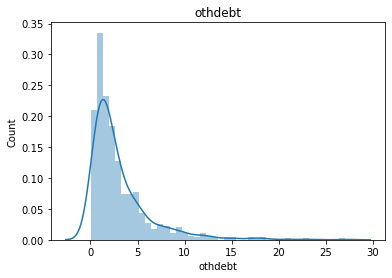

<Figure size 1080x1080 with 0 Axes>

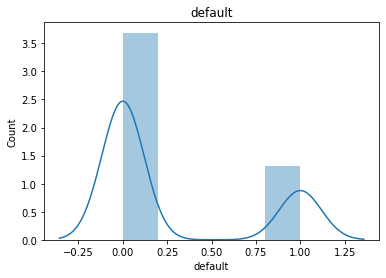

<Figure size 1080x1080 with 0 Axes>

In [9]:
for feature in num_features:           #plotting distribution of features for model
    data=data.copy()
    sns.distplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

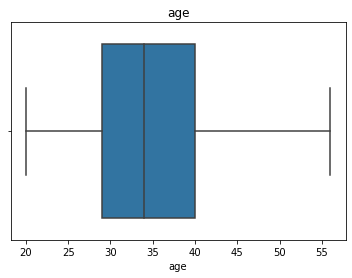

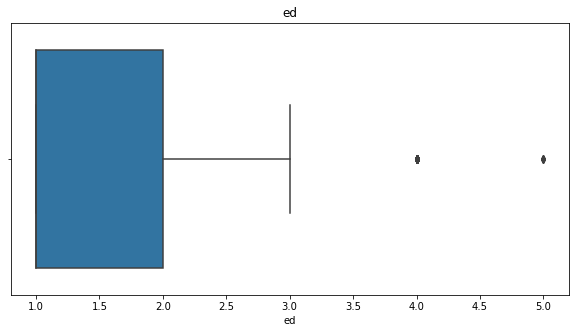

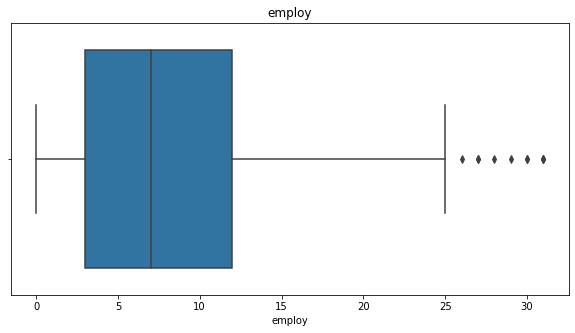

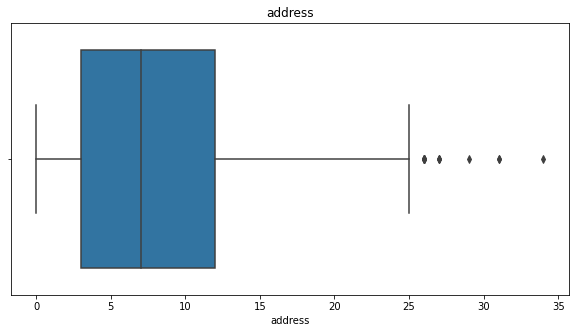

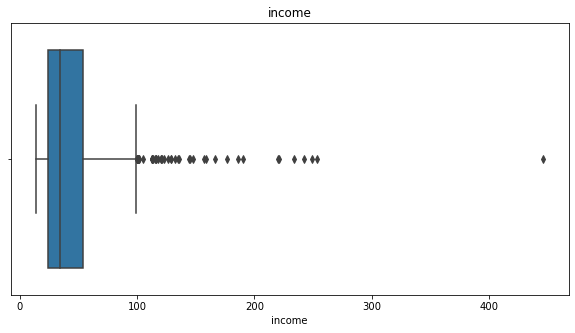

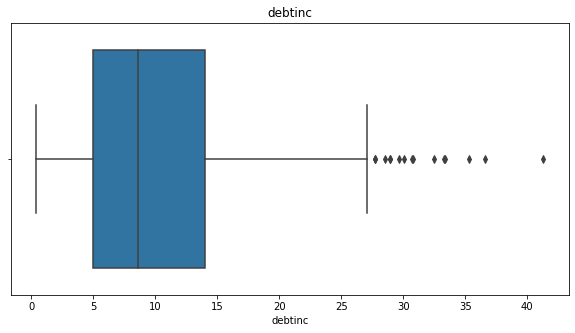

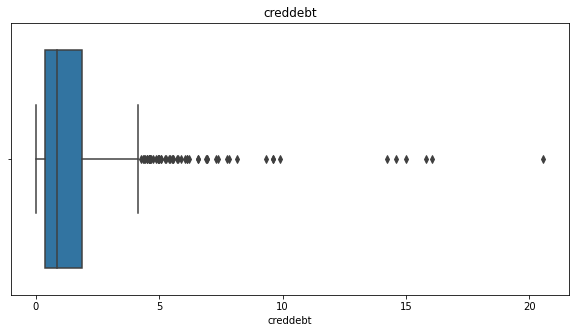

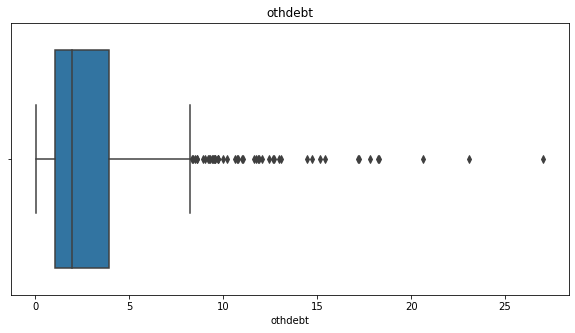

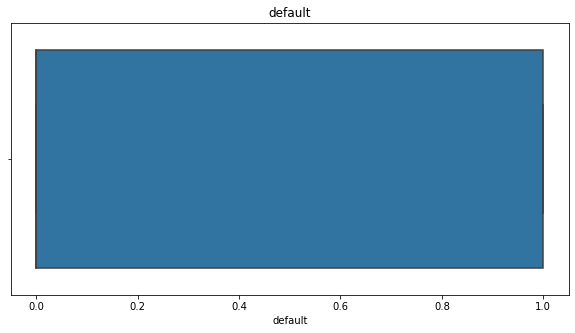

<Figure size 720x360 with 0 Axes>

In [10]:
for feature in num_features:         #plotting outliers
    data=data.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(10,5))

<AxesSubplot:title={'center':'Barplot between age and creddebt'}, xlabel='age', ylabel='creddebt'>

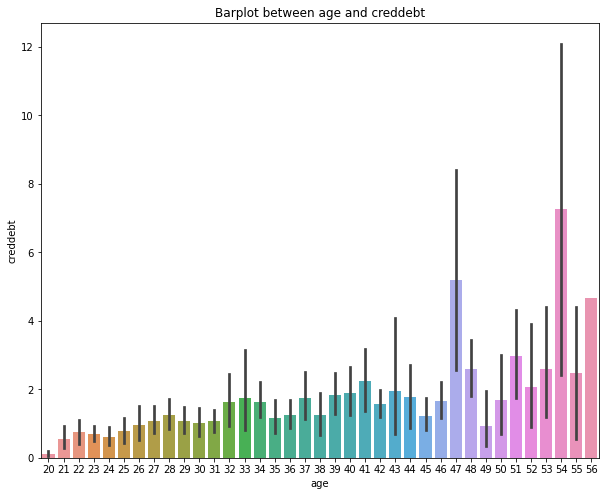

In [11]:
plt.figure(figsize=(10,8))
plt.title("Barplot between age and creddebt")
sns.barplot(data=data,x='age',y='creddebt')

<AxesSubplot:title={'center':'Barplot between employ and creddebt'}, xlabel='employ', ylabel='creddebt'>

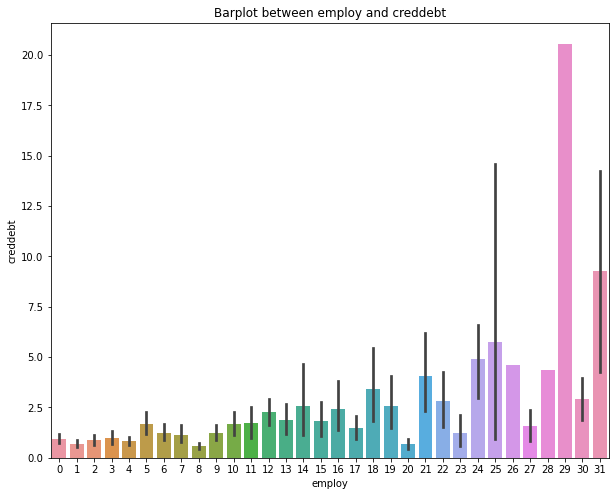

In [12]:
plt.figure(figsize=(10,8))
plt.title("Barplot between employ and creddebt")
sns.barplot(data=data,x='employ',y='creddebt')

<AxesSubplot:title={'center':'Barplot between income and creddebt'}, xlabel='income', ylabel='creddebt'>

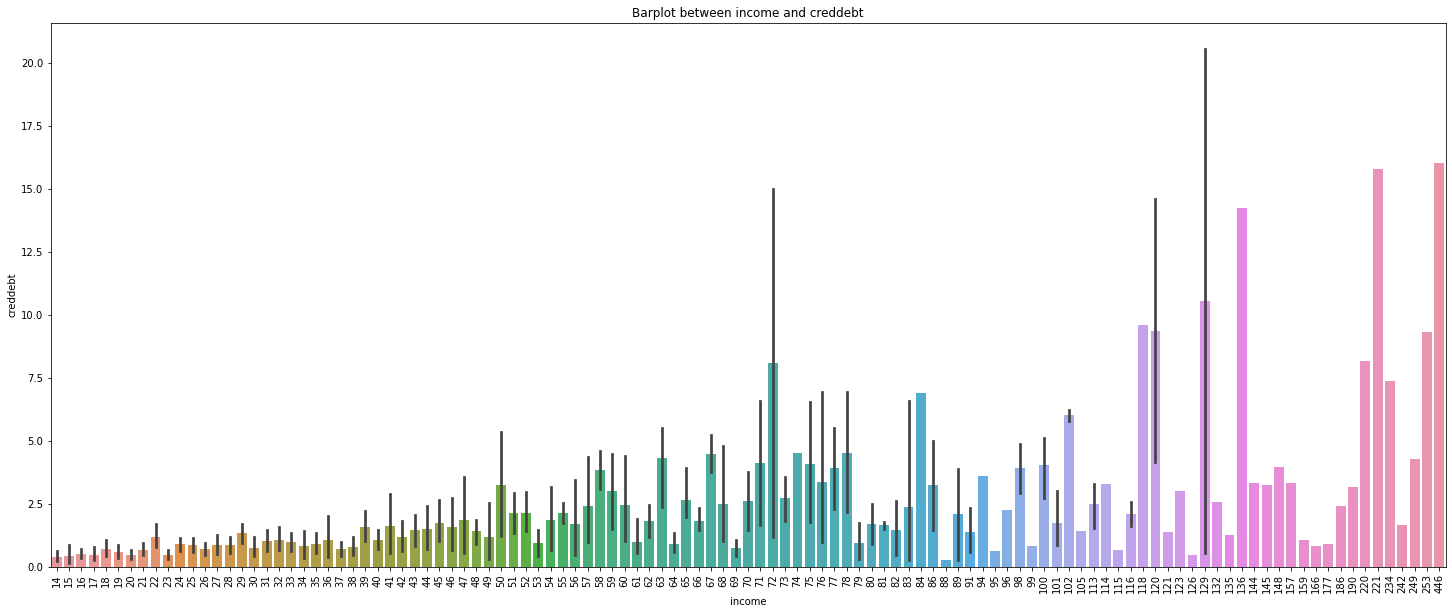

In [13]:
plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
plt.title("Barplot between income and creddebt")
sns.barplot(data=data,x='income',y='creddebt')

<AxesSubplot:title={'center':'lineplot between age and creddebt'}, xlabel='age', ylabel='creddebt'>

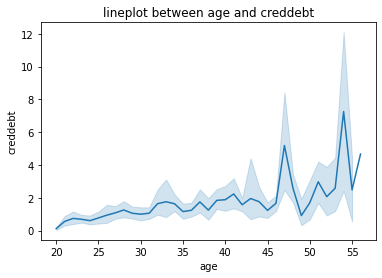

In [14]:
plt.title("lineplot between age and creddebt")
sns.lineplot(data=data,x='age',y='creddebt')

<AxesSubplot:title={'center':'lineplot between employ and creddebt'}, xlabel='employ', ylabel='creddebt'>

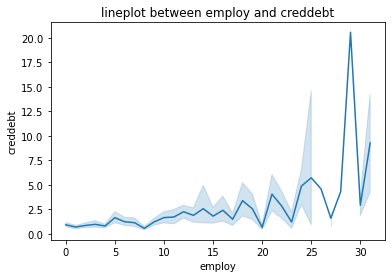

In [15]:
plt.title("lineplot between employ and creddebt")
sns.lineplot(data=data,x='employ',y='creddebt')

<AxesSubplot:title={'center':'lineplot between income and creddebt'}, xlabel='income', ylabel='creddebt'>

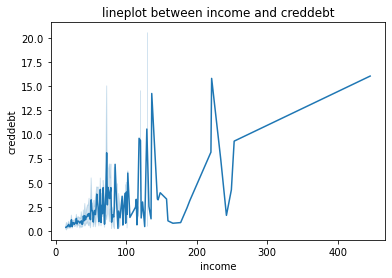

In [16]:
plt.title("lineplot between income and creddebt")
sns.lineplot(data=data,x='income',y='creddebt')

In [92]:
import scipy.stats as stats                 #plotting qq plots
                                            #A q-q plot is a plot of the quantiles of 
                                            #the first data set against the quantiles of the second data set.
def qq_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

age


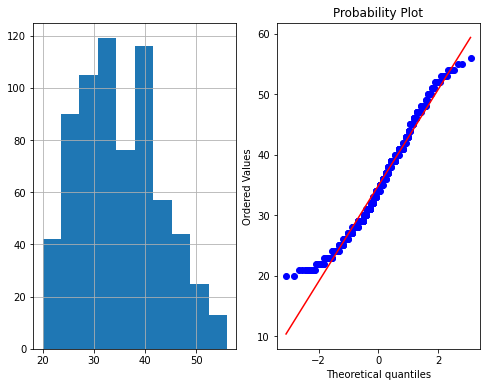

ed


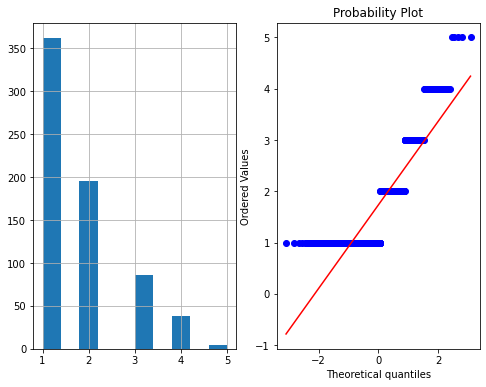

employ


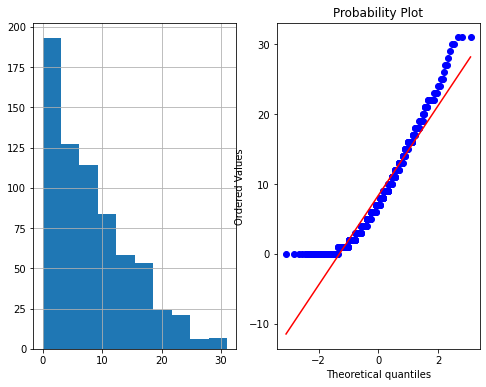

address


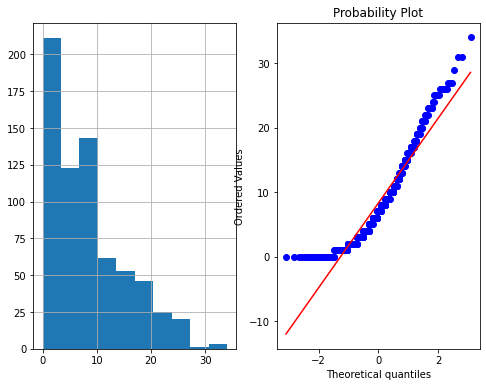

income


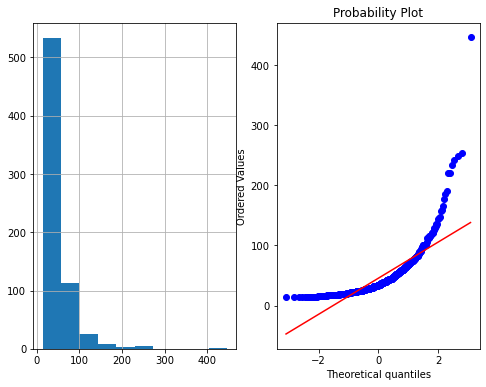

debtinc


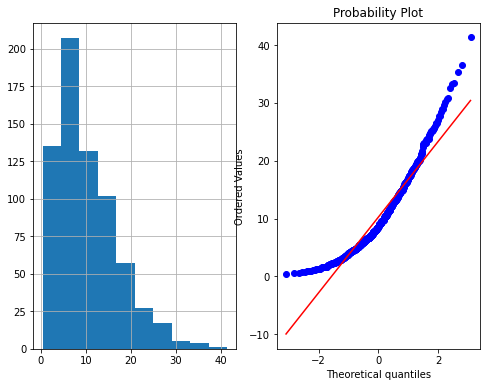

creddebt


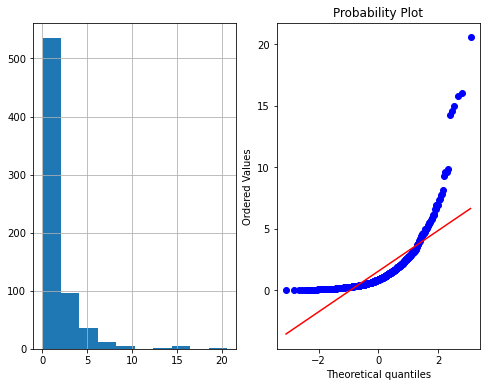

othdebt


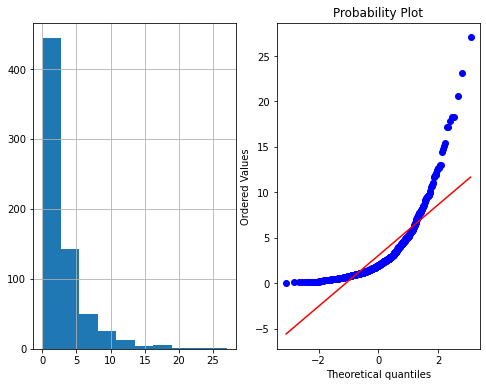

default


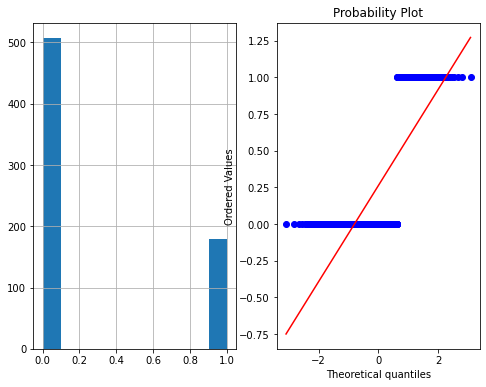

In [93]:
for feature in num_features:
    print(feature)
    plt.figure(figsize=(8,6))
    plt.subplot(1, 2, 1)
    data[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(data[feature], dist="norm", plot=plt)
    plt.show()

In [94]:
x = data[['age', 'ed', 'employ', 'address', 'income', 'debtinc','othdebt', 'default']]    #splitting features and labels
y = data['creddebt']

In [95]:
x

,age,ed,employ,address,income,debtinc,othdebt,default
0,52,1,6,9,29,16.3,3.011099,0
1,48,1,22,15,100,9.1,5.396300,0
2,36,2,9,6,49,8.6,3.396484,1
3,36,2,13,6,41,16.4,3.805784,1
4,43,1,23,19,72,7.6,4.290048,0
...,...,...,...,...,...,...,...,...
682,36,2,6,15,27,4.6,0.979938,1
683,29,2,6,4,21,11.5,2.045505,0
684,33,1,15,3,32,7.6,1.940736,0
685,45,1,19,22,77,8.4,4.165392,0


In [96]:
from sklearn.model_selection import train_test_split      # importing libraries
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [97]:
x_train.shape

(549, 8)

In [98]:
x_test.shape

(138, 8)

In [99]:
lm = LinearRegression()          # training regression model
lm.fit(x_train, y_train)
pred = lm.predict(x_test)

In [100]:
from sklearn.metrics import mean_squared_error     # calculating MSE, RMSE and MAE value
from sklearn.metrics import mean_absolute_error
print('MSE',mean_squared_error(y_test, pred))
print('RMSE',mean_squared_error(y_test, pred,squared=False))
print('MAE',mean_absolute_error(y_test, pred))

MSE 2.092184572606088
RMSE 1.446438582382981
MAE 0.8704689901320998


### Multiple Regression Analysis 

We can see that our predictions our close enough to the test set but how do we find the most important factor contributing to the profit.
Here is a solution for that.
We know that the equation of a multiple linear regression line is given by y=b1+b2*x+b3*x’+b4*x”+…….
where b1, b2, b3, … are the coefficients and x, x’, x” are all independent variables.
Since we don’t have any ‘x’ for the first coefficient we assume it can be written as a product of b and 1 and hence we append a column of ones. There are libraries that take care of it but since we are using the stats model library we need to explicitly add the column.

In [112]:
idx = 0                          # adding constant column
new_col = np.ones((687, 1)).astype(int)
data.insert(loc=idx, column='constant', value=new_col)

In [114]:
x_columns = ['constant','age', 'ed', 'employ', 'address', 'income', 'debtinc','othdebt', 'default']
y = data['creddebt']

In [115]:
def get_stats():             #defining stats function for OLS regression method
    x = data[x_columns]
    results = sm.OLS(y, x).fit()
    print(results.summary())
get_stats()

                            OLS Regression Results                            
Dep. Variable:               creddebt   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     135.4
Date:                Thu, 25 Nov 2021   Prob (F-statistic):          4.15e-135
Time:                        19:10:05   Log-Likelihood:                -1155.0
No. Observations:                 687   AIC:                             2328.
Df Residuals:                     678   BIC:                             2369.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant      -1.5426      0.288     -5.356      0.0

“Coefficients having p-values less than alpha are statistically significant. For example, if you chose alpha to be 0.05, coefficients having a p-value of 0.05 or less would be statistically significant (i.e., you can reject the null hypothesis and say that the coefficient is significantly different from 0).”

In other words, we would generally want to drop variables with a p-value greater than 0.05.

In [116]:
x_columns.remove("ed")   # removing independent variable having p value > 0.05
get_stats()

                            OLS Regression Results                            
Dep. Variable:               creddebt   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     154.4
Date:                Thu, 25 Nov 2021   Prob (F-statistic):          7.21e-136
Time:                        19:11:06   Log-Likelihood:                -1155.8
No. Observations:                 687   AIC:                             2328.
Df Residuals:                     679   BIC:                             2364.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant      -1.6735      0.269     -6.216      0.0

In [118]:
x_columns.remove("age")   # removing independent variable having p value > 0.05
get_stats()

                            OLS Regression Results                            
Dep. Variable:               creddebt   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     179.7
Date:                Thu, 25 Nov 2021   Prob (F-statistic):          1.19e-136
Time:                        19:11:49   Log-Likelihood:                -1156.7
No. Observations:                 687   AIC:                             2327.
Df Residuals:                     680   BIC:                             2359.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant      -1.9681      0.145    -13.547      0.0

In [119]:
x_columns.remove("address")   # removing independent variable having p value > 0.05
get_stats()

                            OLS Regression Results                            
Dep. Variable:               creddebt   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     215.5
Date:                Thu, 25 Nov 2021   Prob (F-statistic):          1.22e-137
Time:                        19:12:10   Log-Likelihood:                -1157.1
No. Observations:                 687   AIC:                             2326.
Df Residuals:                     681   BIC:                             2353.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant      -1.9289      0.139    -13.841      0.0

In [121]:
x_columns.remove("othdebt")    # removing independent variable having p value > 0.05
get_stats()

                            OLS Regression Results                            
Dep. Variable:               creddebt   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     268.2
Date:                Thu, 25 Nov 2021   Prob (F-statistic):          2.37e-138
Time:                        19:12:35   Log-Likelihood:                -1158.3
No. Observations:                 687   AIC:                             2327.
Df Residuals:                     682   BIC:                             2349.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant      -1.8096      0.117    -15.486      0.0

Finally, we find that there are 4 variables left, namely employ, income, debtinc and default. Since each of the p-values are below 0.05, all of these variables are said to be statistically significant.

In [124]:
## creating a linear model and prediction
x_data = data[[ 'employ', 'income', 'debtinc','default']]
y_data = data['creddebt']

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 0)

In [126]:
lm = LinearRegression()   #fitting training data in model with 4 independent variables which have p value <=0.05
lm.fit(X_train, y_train)
pred = lm.predict(X_test)

In [127]:
from sklearn.metrics import mean_squared_error       # calculating MSE, MAE and RMSE value for new model
from sklearn.metrics import mean_absolute_error
print('MSE',mean_squared_error(y_test, pred))
print('RMSE',mean_squared_error(y_test, pred,squared=False))
print('MAE',mean_absolute_error(y_test, pred))

MSE 2.0769261920369577
RMSE 1.4411544650164874
MAE 0.8700975154462703


In [1]:
from sklearn.metrics import mean_squared_error       # calculating MSE, MAE and RMSE value for new model
from sklearn.metrics import mean_absolute_error
print('MSE',mean_squared_error(y_test, pred))
print('RMSE',mean_squared_error(y_test, pred,squared=False))
print('MAE',mean_absolute_error(y_test, pred))

NameError: name 'y_test' is not defined